# Project 1 Laptsuev Rodion.

## 1. Network summary

### 1.1. Network source and preprocessing

In [1]:
import urllib2, json, sys, time
import networkx as nx
import ast
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt 
import scipy.spatial as spt
matplotlib.rcParams['figure.figsize'] = (18, 12)
import scikits.statsmodels as sm
import scikits.statsmodels.tools as smtools
from scipy.stats import geom

In [2]:
# Your token - sequence of symbols that goes after access_token=
token = 'e2ab725f04d0b24ef13d00a190ea211f899a29d7279a6df8537bb424f5ad4d50a004ed974e27d76bedbbf' 

# Suppose you want to get a friendlist of a particular user.
# You also want hometown, sex and education to be contained in this list.
# Finnaly, I suggest to put lang=en to aviod cyrillic issues
uid = raw_input("write vk id (only numbers):")
url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&access_token=%s' %(uid ,token)

res  = urllib2.urlopen(url).read()
data = json.loads( res )

write vk id (only numbers):15163209


In [4]:
G=nx.Graph()
names={}
city={}
universities={}
sex={}
for i in range(len(data['response'])):
    G.add_node(data['response'][i]['uid'])
    names.update({data['response'][i]['uid']: ast.literal_eval(json.dumps(data['response']))[i][u'first_name'].strip()+' '+ast.literal_eval(json.dumps(data['response']))[i][u'last_name'].strip()})
    sex.update({data['response'][i]['uid']: ast.literal_eval(json.dumps(data['response']))[i][u'sex']})
    try:
        city.update({data['response'][i]['uid']: ast.literal_eval(json.dumps(data['response']))[i][u'city']})
    except:
        city.update({data['response'][i]['uid']:0})
    try:
        universities.update({data['response'][i]['uid']:ast.literal_eval(json.dumps(data['response']))[i]['university']})
    except:
        universities.update({data['response'][i]['uid']:0})

In [5]:
for us in nx.nodes(G):
    time.sleep(1)
    uid=us
    url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&access_token=%s' %(uid ,token)
    res  = urllib2.urlopen(url).read()
    data1 = json.loads( res )
    friends=list()
    try:
        for j in range(len(data1['response'])):
            friends.append(data1['response'][j]['uid'])
        for l in friends:
            if l in nx.nodes(G):
                G.add_edge(us,l)
    except:
        continue

### 1.2. Nodes attributes, edges only give info about if the users are friends.

In [158]:
nx.set_node_attributes(G, 'name', names)
nx.set_node_attributes(G, 'sex', sex)
nx.set_node_attributes(G, 'university', universities)
nx.set_node_attributes(G, 'city', city)

In [66]:
nx.write_gml(G, "network.gml")

this was the end of aplication

### 1.3. Size and order.
dunno what u want from order but size of networkx can be measured by amount of nodes and edges.

In [67]:
print len(G.nodes()), 'nodes amount'
print len(G.edges()), 'edges amount'

289 nodes amount
2361 edges amount


### 1.4 Network representation and first look on structure.

structure according to the node degree

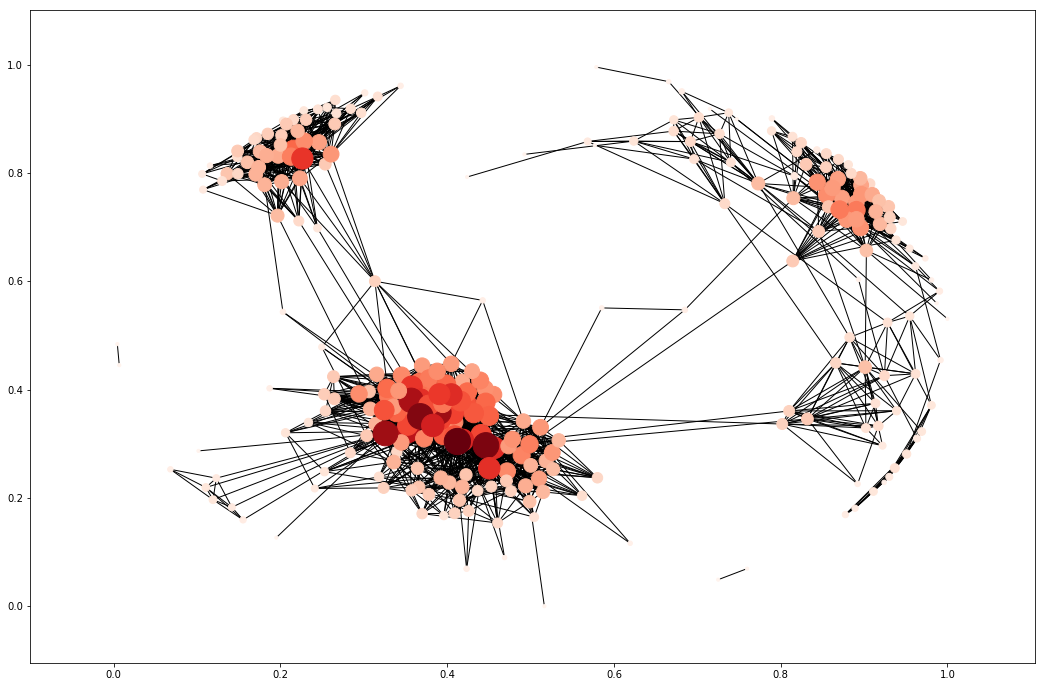

In [94]:
k = nx.degree(G)
nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 labels=nx.get_node_attributes(G,'name'),
                 with_labels=False
                 )

according to city where blue is Moskow, green is Spb, red is Pskov and yellow all other cities.

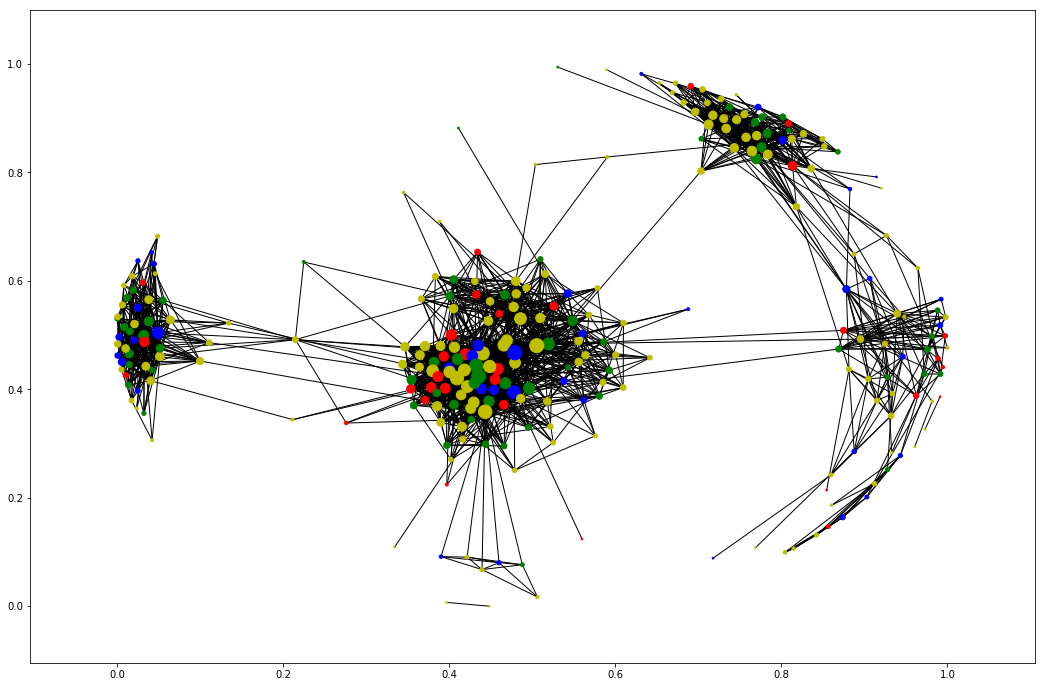

In [95]:
city_cl=list()
for i in city:
    if i==2:
        city_cl.append('g')
    if i==114:
        city_cl.append('r')
    if i==1:
        city_cl.append('b')
    else:
        city_cl.append('y')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 nodelist=k.keys(),
                 node_size = [d*3 for d in k.values()],
                 node_color=city_cl,
                 font_size=12,
                 labels=nx.get_node_attributes(G,'name'),
                 with_labels=False
                 )

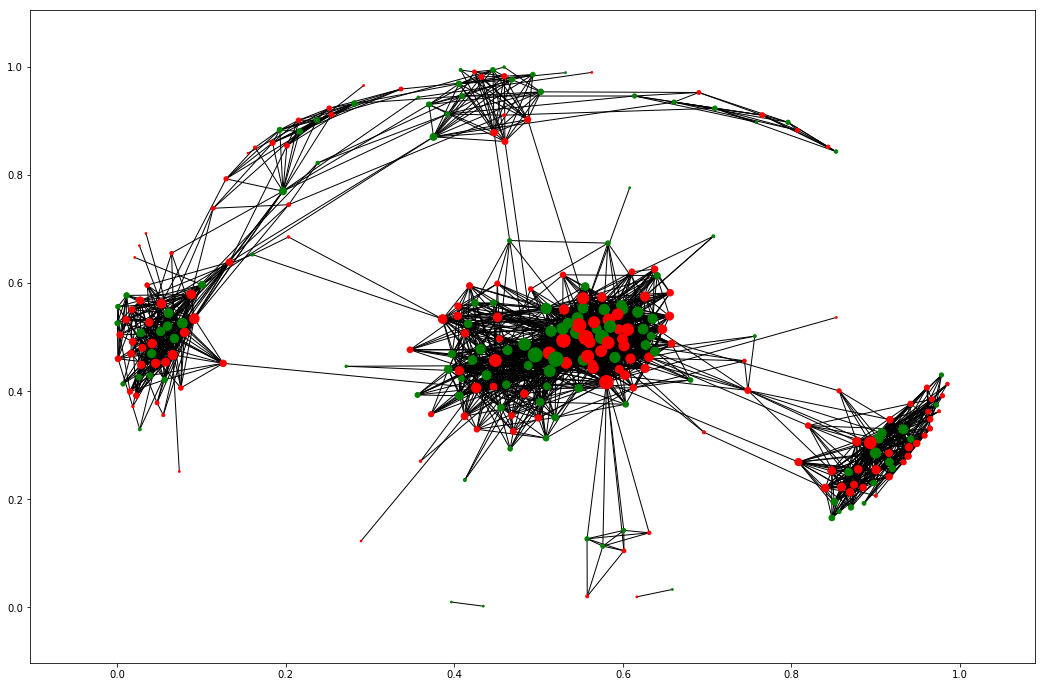

In [106]:
sex_cl=list()
for i in sex:
    if i==1:
        sex_cl.append('g')
    else:
        sex_cl.append('r')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 nodelist=k.keys(),
                 node_size = [d*3 for d in k.values()],
                 node_color=sex_cl,
                 font_size=12,
                 labels=nx.get_node_attributes(G,'name'),
                 with_labels=False
                 )

### 1.5. degree distribution, diameter, cl_coef. 
it's closer to power law than for normal distribution 

(array([ 47.,  29.,  50.,  25.,  31.,  21.,  20.,  15.,  12.,   6.,   6.,
          8.,   3.,   7.,   1.,   1.,   0.,   4.,   1.,   2.]),
 array([  0.  ,   3.45,   6.9 ,  10.35,  13.8 ,  17.25,  20.7 ,  24.15,
         27.6 ,  31.05,  34.5 ,  37.95,  41.4 ,  44.85,  48.3 ,  51.75,
         55.2 ,  58.65,  62.1 ,  65.55,  69.  ]),
 <a list of 20 Patch objects>)

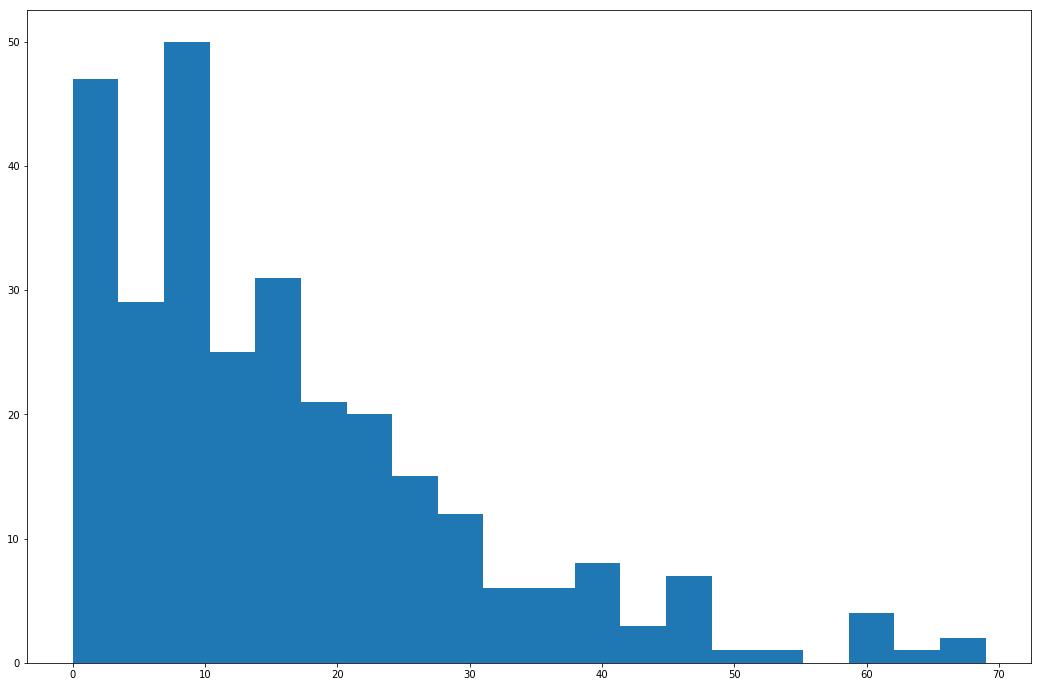

In [109]:
plt.hist(G.degree().values(),20)

In [167]:
G1=list(nx.connected_component_subgraphs(G, copy=False))
for g in G1:
    print (nx.number_of_edges(g))
G2=G1[1]
print "Radius", nx.radius(G2)
print "Diametr", nx.diameter(G2)

0
2359
0
0
0
1
0
0
0
0
1
0
0
0
0
Radius 5
Diametr 10


In [312]:
print nx.average_clustering(G), "clustering coeff"
print nx.average_shortest_path_length(G2), "shp_len_aver"

0.522036958268 clustering coeff
3.80831178625 shp_len_aver


## 2. Structural analysis

### 2.1 Centralities and interpretation 

Degree centrality: number of nearest neighbours normalized by all nodes-1 because the largest amount of edges is n-1=1 degree centr. As we can see from the picture there not so many nodes with large values of degree centrality and the top 5 list present the most active persons from my friends 

Andrey Prudnikov 0.211805555556
Igor Shapovalov 0.211805555556
Sofya Timofeeva 0.225694444444
Igor Trefilov 0.229166666667
Sergey Kucherenko 0.239583333333


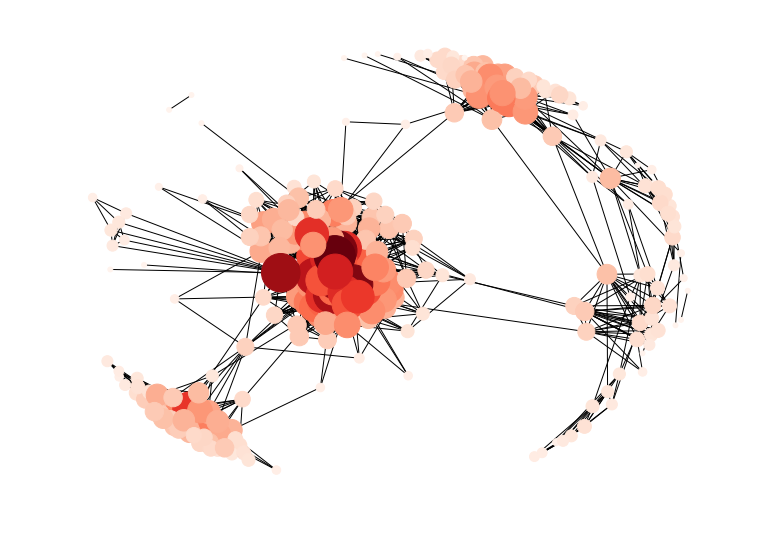

In [162]:
# Degree centrality
dc = nx.degree_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
pos = nx.spring_layout(G) 
nx.draw(G,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
z=sorted(dc.items(), key=lambda x:x[1])[len(dc)-5:len(dc)]
for i in z:
    print G.node[i[0]]['name'], i[1]

Closeness centrality: how close an actor to all the other actors in network. As we can see from the picture there  many nodes with nearly high values of closeness centrality and the top 5 list present 4 from degree centrality list and 1 new person more over all this person are from spb but now some persons in moskow so it helped them to decrease distance.  

Sergey Kucherenko 0.345280764636
Ksenia Chistyakova 0.35142118863
Ivan Suchilin 0.357783967812
Igor Shapovalov 0.360799001248
Igor Trefilov 0.366460611824


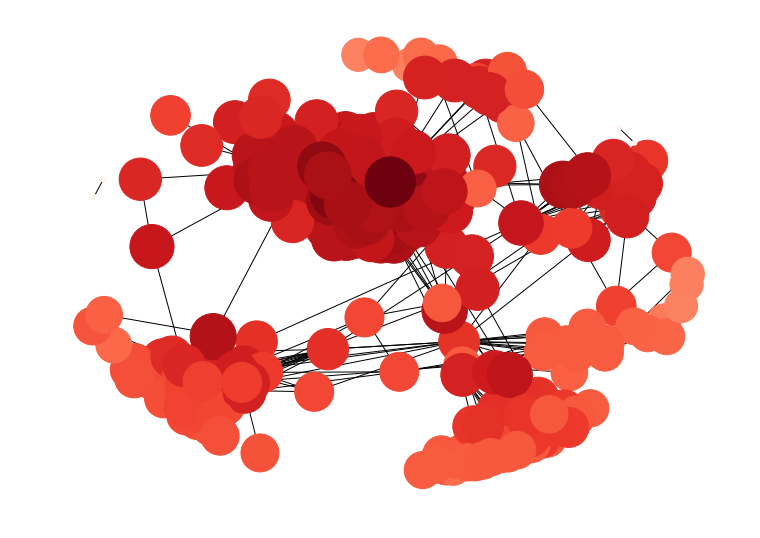

In [163]:
# closness centrality
dc = nx.closeness_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
pos = nx.spring_layout(G) 
nx.draw(G,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
z=sorted(dc.items(), key=lambda x:x[1])[len(dc)-5:len(dc)]
for i in z:
    print G.node[i[0]]['name'], i[1]

Betweenness centrality: number of shortest paths going through the actor. As we can see from the picture there not so many nodes with large values of betweeness centrality and the top 5 list present contain 3 persons from previous centrality metrics and 2 new persons. This persons should be linked with nodes that have the very limited amount of pathes (may be this is nodes connected to nodes that have only one common friend). 

Igor Trefilov 0.096851027914
Alexander Grishin 0.104687208746
Igor Shapovalov 0.163373189777
Anastasia Antipova 0.191040702106
Ksenia Chistyakova 0.19675001106


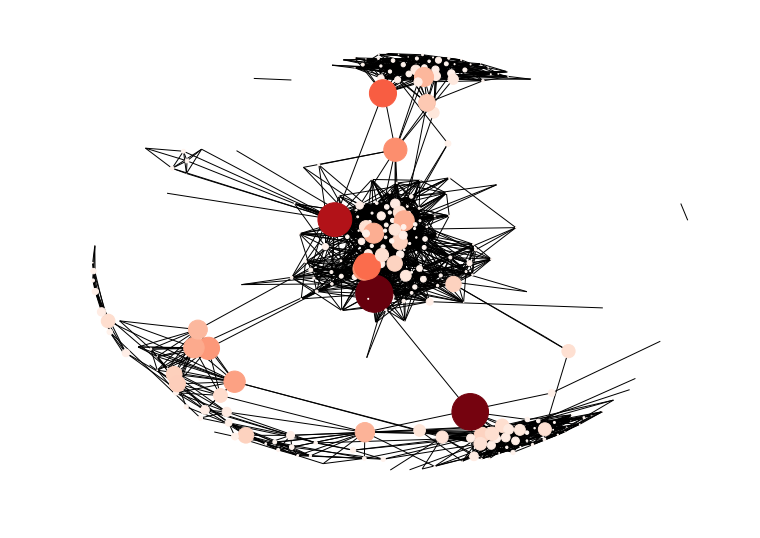

In [164]:
# betweness centrality
dc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
pos = nx.spring_layout(G) 
nx.draw(G,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
z=sorted(dc.items(), key=lambda x:x[1])[len(dc)-5:len(dc)]
for i in z:
    print G.node[i[0]]['name'], i[1]

### 2.2 Page rank
PageRank works by counting the number and quality of links to a node to determine a rough estimate of how important the node is. The underlying assumption is that more important nodes are likely to receive more links from other nodes.
As we can see from results 3 persons are the same but te largest value has new person Dmitry Meynster. This is preaty interesting result because he do not have the most popular nodes in a friend list. 

Sofya Timofeeva 0.00890301936916
Sergey Kucherenko 0.00934750847174
Igor Trefilov 0.00946900941448
Igor Shapovalov 0.00999458446013
Dmitry Meynster 0.0104643412476


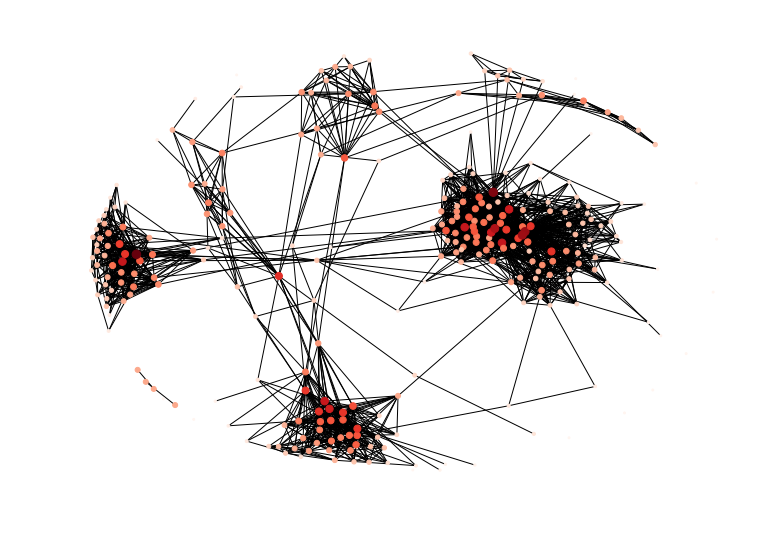

In [166]:
# page rank
dc = nx.pagerank(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
pos = nx.spring_layout(G) 
nx.draw(G,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
z=sorted(dc.items(), key=lambda x:x[1])[len(dc)-5:len(dc)]
for i in z:
    print G.node[i[0]]['name'], i[1]

So the most central persons is two persons with same name Igor (Shapovalov and Trefilov) very sociable persons 1 lived in Rostov, Spb, Moskow and other in Tomsk and Spb. 

### 2.3 Assortative mixing according to nodes attributes
int this part we will test what influence does attributes have on the probability that two nodes is connected (does the same value of attribute give a positive influence on it). From my point of view value of university assortativity should be bigger but the problem is that many persons have not written their universities so they has 0 value there and this is a problem for such low value of assortativity. 

In [168]:
nx.degree_assortativity_coefficient(G2)

0.26867869929629212

In [170]:
nx.attribute_assortativity_coefficient(G2, 'sex')

0.20424311792140987

In [171]:
nx.attribute_assortativity_coefficient(G2, 'city')

0.18902679626100555

In [172]:
nx.attribute_assortativity_coefficient(G2, 'university')

0.20031215424720225

### 2.4 Nodes structural equivalence or similarity
from the illustrations we can see that there some similar nodes (look at 3-rd and 4-th) 

In [96]:
def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')

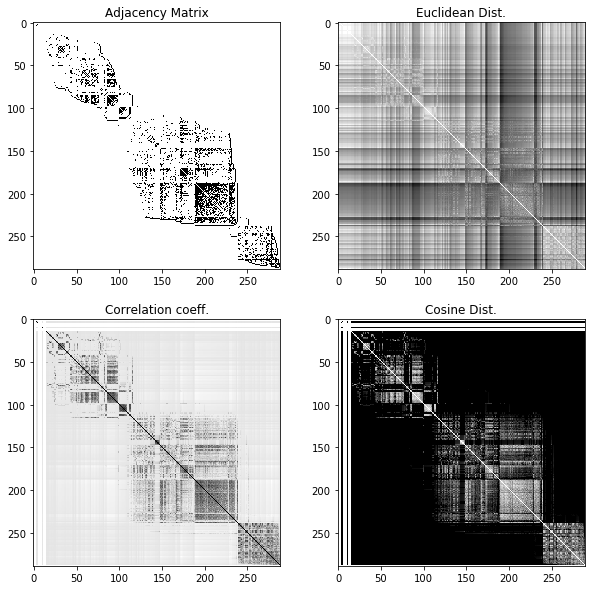

In [101]:
rcm = list(nx.utils.reverse_cuthill_mckee_ordering(G)) 
A = nx.to_numpy_matrix(G, nodelist=rcm) 
A = np.asarray(A) 
plotDist(A)

### 2.5 The closest randomgraph model that is similar
I think that from studied the most appropriate was model A from task with partls of babrabasi algorithm use. 

In [173]:
def gen_graph_A(n, m):
    G = nx.Graph()
    nodes = list(range(1,m+1))
    G.add_nodes_from(nodes)
    for i in range(m+1,n+1):
        l=list()
        l.append(i)
        G.add_nodes_from(l)
        edges=list()
        for j in range(1,i):
            edges.append([i,j])
        rand_smpl = [ edges[i] for i in sorted(random.sample(range(len(edges)), m)) ]
        G.add_edges_from(rand_smpl)
    return G

3
0.213516739323


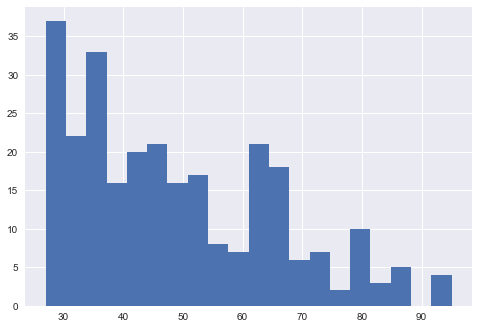

In [304]:
A=gen_graph_A(273,27)
plt.hist(A.degree().values(),20)
print(nx.diameter(A))
print(nx.average_clustering(A))

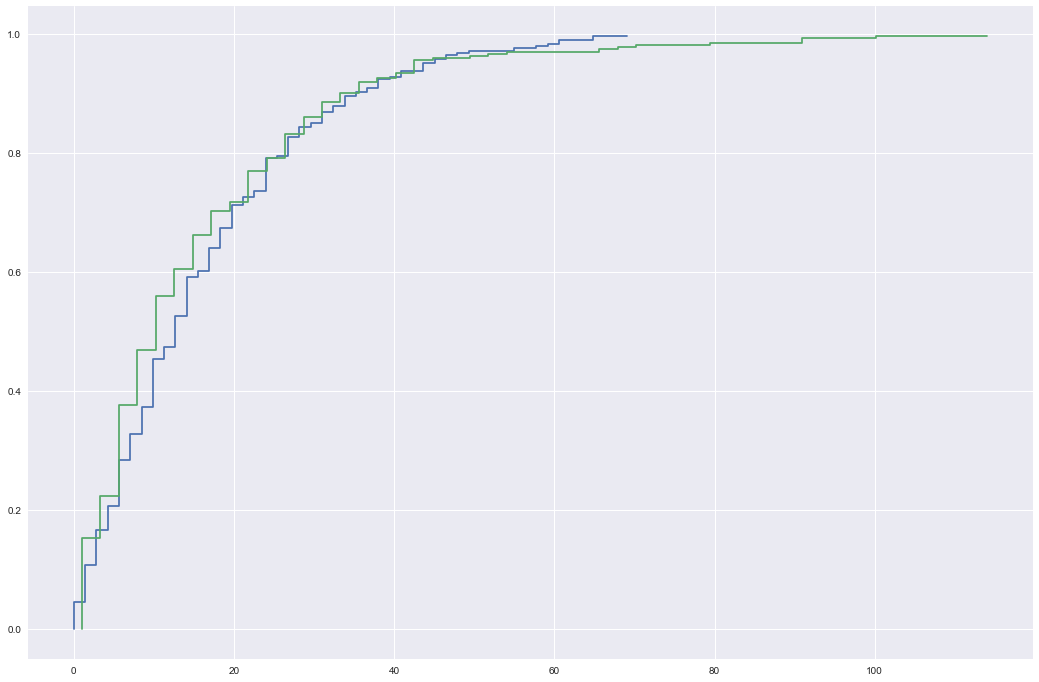

In [310]:
ecdf = smtools.tools.ECDF(G.degree().values())
x = np.linspace(min(G.degree().values()), max(G.degree().values()))
y = ecdf(x)
plt.step(x, y)
r = geom.rvs(1.0/(np.mean(G.degree().values())), size=273)
ecdf_1 = smtools.tools.ECDF(r)
x2 = np.linspace(min(r), max(r))
y2 = ecdf_1(x2)
plt.step(x2, y2)

## 3. Community detection

### 3.1 Clique search

In [177]:
cliques = list(nx.find_cliques(G))
LenCliq = [len(x) for x in cliques]
indxx = np.argmax(LenCliq)
indxx

1009

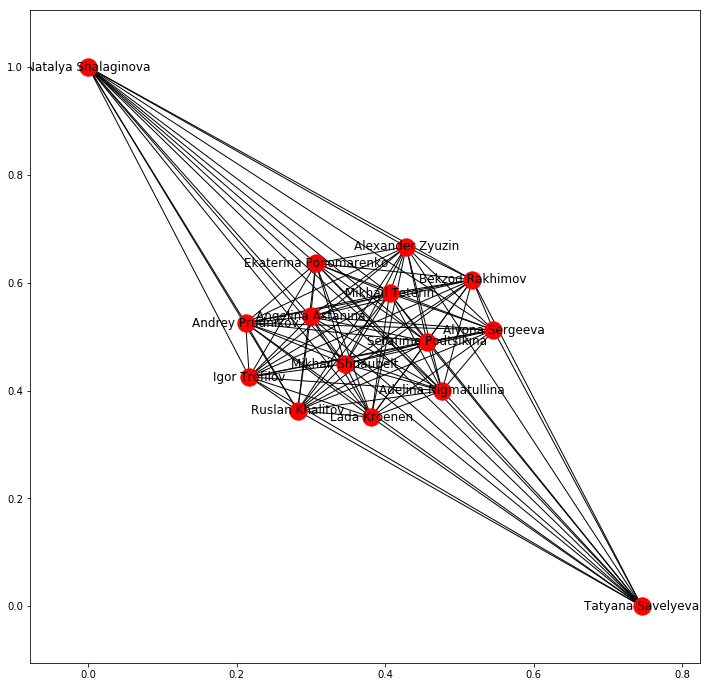

In [180]:
len(cliques[indxx])
plt.figure(figsize=(12,12))
nx.draw_networkx(G.subgraph(cliques[indxx]),labels=nx.get_node_attributes(G.subgraph(cliques[indxx]),'name'), with_labels=True)
plt.savefig('LargestClique.png', dpi = 300)

### 3.2. Community detection algorithm. 

In [313]:
import igraph as ig
nx.write_gml(G2, 'G2.gml')
G3 = ig.read('G2.gml')
communities = ig.Graph.community_fastgreedy(G3)
clusters = communities.as_clustering()
pos = nx.fruchterman_reingold_layout(G2)

In [314]:
css = [[] for i in range(len(clusters))]
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        css[i].append(list(G2.nodes())[clusters[i][j]])

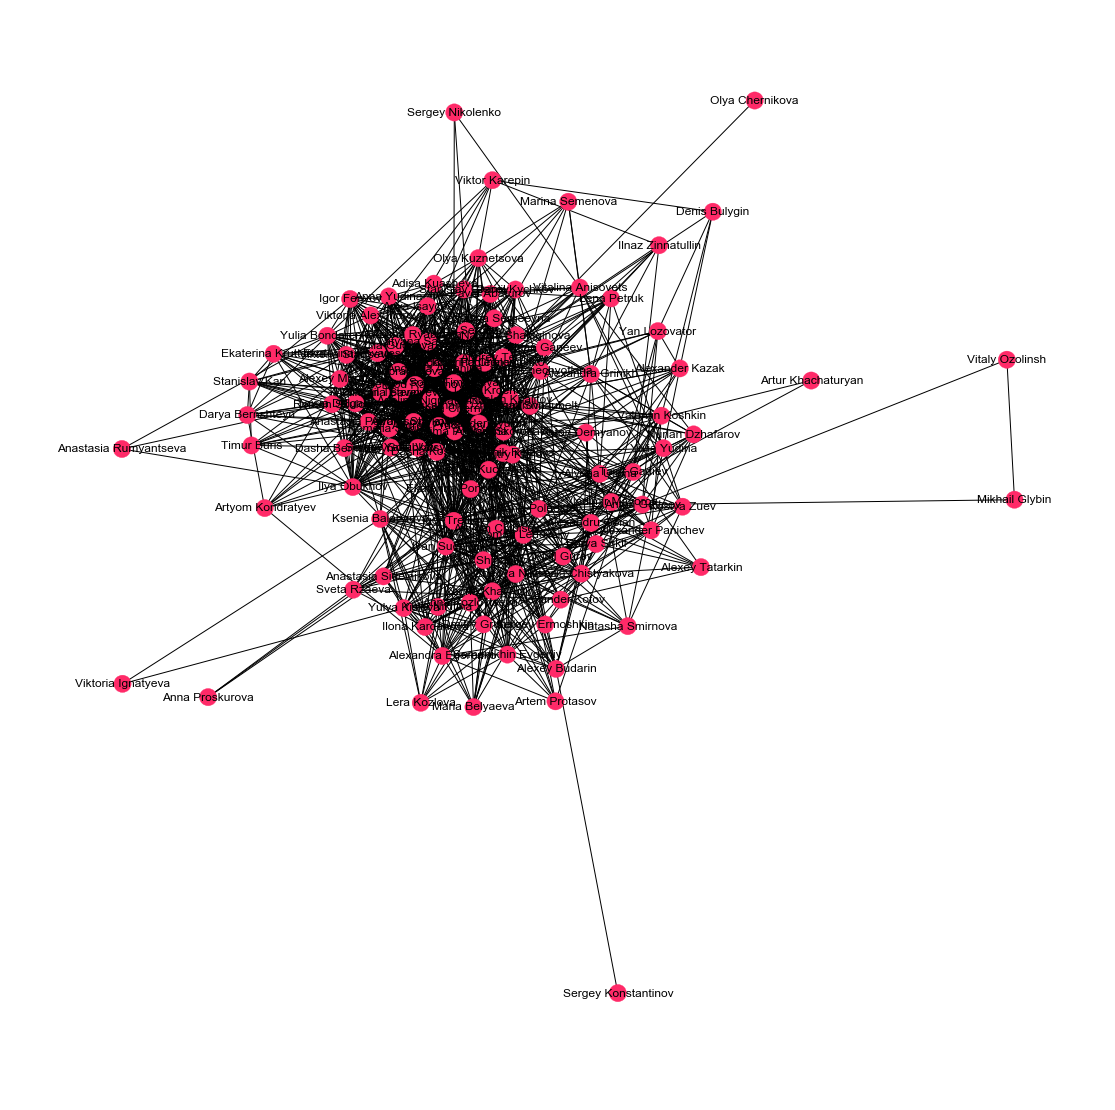

In [238]:
nx.draw(G2.subgraph(css[0]), node_color = color[0], pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[0]),'name'), with_labels=True)


{592376: 'Vladislav Lashkin',
 955658: 'Marina Didyaeva',
 1268002: 'Ekaterina Alexeeva (Savchenko)',
 2205237: 'Kira Kirelli',
 2309471: 'Ksenia Lotos',
 2324667: 'Lolita Mageramova',
 3077652: 'Roman Afanasyev',
 3155266: 'Lyuda Burchenkova',
 3554530: 'Seryoga Metlenko',
 4658123: 'Anastasya Goryacheva:)',
 5207106: 'Anya Lashkina',
 6291827: 'Vyacheslav Kopyl',
 6811812: 'Elts Natalya',
 6892243: 'Daniil Myslevich',
 7357273: 'Ilya Pechatnikov',
 7409881: 'Viktoria Ponomareva',
 7848391: 'Sasha Palkin',
 7971022: 'Egor Ivensky',
 8413028: 'Nastya Nastya',
 8881606: 'Regina Chemyakina',
 9616429: 'Gyuzal Mustafaeva',
 9787708: 'Egor Yakovlev',
 10200614: 'Sergey Vakhnin',
 10823846: 'Vera Anashkina',
 12586147: 'Anastasia Babenko',
 12791303: 'Mashka Mikhaylova',
 13334128: 'Serge Kapustin',
 13433670: 'Linda Valeeva',
 13512679: 'Elizaveta Nikitina',
 13664803: 'Oleg Golosov',
 13671875: 'Darya Vovnoboy',
 13807736: 'Anita Antipova',
 14397698: 'Anna Mirvis',
 14787669: 'Lolita Mag

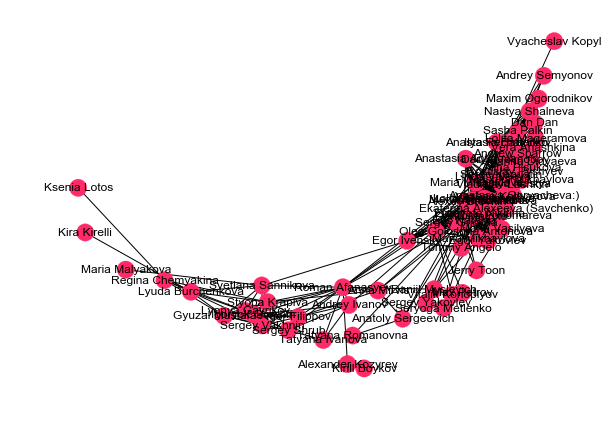

In [239]:
nx.draw(G2.subgraph(css[1]), node_color = color[0], pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[1]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[1]),'name')

{5844427: 'Alex Sobolev',
 6328193: 'Seryoga Tkachyov',
 6399028: 'Elizaveta Chizhikova',
 9486570: 'Anton Ivanov',
 10026923: 'Anya Melnikova',
 12550267: 'Igor Vasilyevich',
 16618517: 'Ekaterina Lukina',
 16967584: 'Tyoma Pavlov',
 23716297: 'Anton Varushenyev',
 28342599: 'Roman Pavlyuk',
 39528457: 'Dmitry Gyotze',
 40912547: 'Marat Yarulin',
 52851466: 'Ekaterina Pavlova',
 57235446: 'Ivan Rossol',
 74090935: 'Philip Komkov',
 91352887: 'Prosto Vitalya',
 92005184: 'Viola Likhoyda',
 107344133: 'Nikita Ivanov',
 134551632: 'Vasily Grossman',
 183046681: 'Igor Mitsevsky',
 183923448: 'Stas Karpov',
 193500679: 'Denis Vladimirovich',
 197336828: 'Oo Oo',
 216751131: 'Alexander Rossol',
 224212472: 'Tyoma Tyoma',
 367553720: 'Ira Chetvergova',
 370172458: 'Prosto Vanya',
 370371447: 'Anatoly Dukalis'}

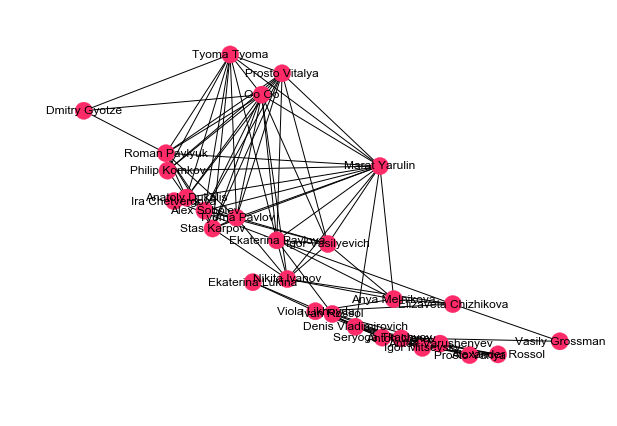

In [240]:
nx.draw(G2.subgraph(css[2]), node_color = color[0], pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[2]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[2]),'name')

{1677259: 'Alexey Avramenko',
 1951327: 'Misha Karpets',
 3082394: 'Maxim Karpov',
 4447674: 'Natasha Jess',
 5349161: 'Shir Shir',
 6395751: 'Marina Ananyeva',
 9100545: 'Mikhail Artemyev',
 9480188: 'Alisa Prostotak',
 9604324: 'Lena Chudakova',
 9693167: 'Evgeny Tetin',
 10095074: 'Ekaterina Skibina',
 12778679: 'Sergey Latatye',
 13237517: 'Oleg Bulanov',
 13986867: 'Sergey Demin',
 16447212: 'Alexander Ageev',
 16677020: 'Bogdan Voronin',
 17292244: 'Ilya Uvarenkov',
 19034163: 'Alexey Barsukov',
 19185624: 'Tsyren Balzhanov',
 19237456: 'Pavel Danilov',
 20287001: 'Valery Kharitonov',
 20376978: 'Rinat Sadykov',
 20497665: 'Leonid Gremyachikh',
 21679895: 'Nadezhda Kostyakova',
 23461709: 'Artyom Ryzhikov',
 23536310: 'Dmitry Meynster',
 25040493: 'Alexander Korotin',
 30623577: 'Rost Gorislavsky',
 31871401: 'Alexander Plentsov',
 33151990: 'Vahe Egiazaryan',
 36267995: 'Dmitry Chernovol',
 38076870: 'Roman Alexandrov',
 41845132: 'Artur Petrosyan',
 45584469: 'Dima Kurgansky',


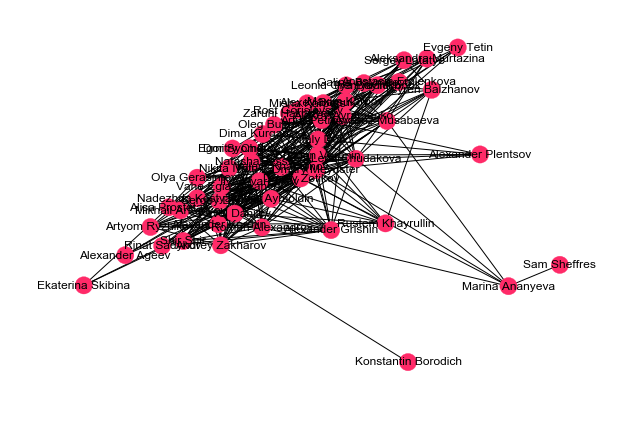

In [241]:
nx.draw(G2.subgraph(css[3]), node_color = color[0], pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[3]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[3]),'name')

{25279250: 'Denis Goryunov',
 34367474: 'Vladimir Alexandrovich',
 34488318: 'Igor Shapovalov',
 54486207: 'Albert Yagodin',
 108848679: 'Nikita Nesterov',
 181129433: 'Evgeny Mateshev',
 185081231: 'Vitalia Panteleychuk',
 351961278: 'Aleksey Shelkovin'}

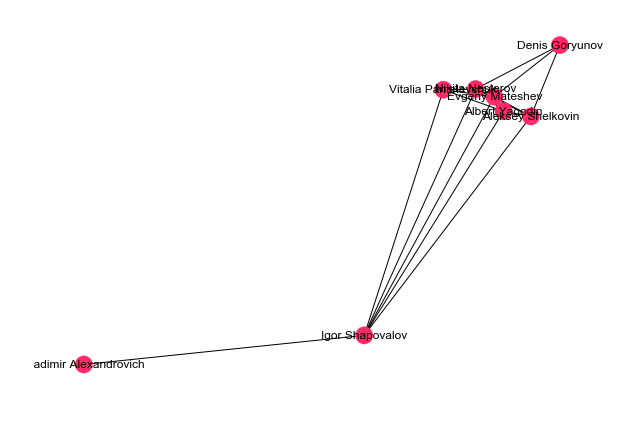

In [242]:
nx.draw(G2.subgraph(css[4]), node_color = color[0], pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[4]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[4]),'name')

In [316]:
col = ['#ff2929', '#fff428', '#2fff28', '#28ffe5', '#a828ff', '#4428ff', '#212121']
color = []
i = 0
for x in css:
    color.append([col[i] for d in x])
    i += 1

[108848679,
 351961278,
 54486207,
 25279250,
 185081231,
 34367474,
 181129433,
 34488318,
 108848679,
 351961278,
 54486207,
 25279250,
 185081231,
 34367474,
 181129433,
 34488318]

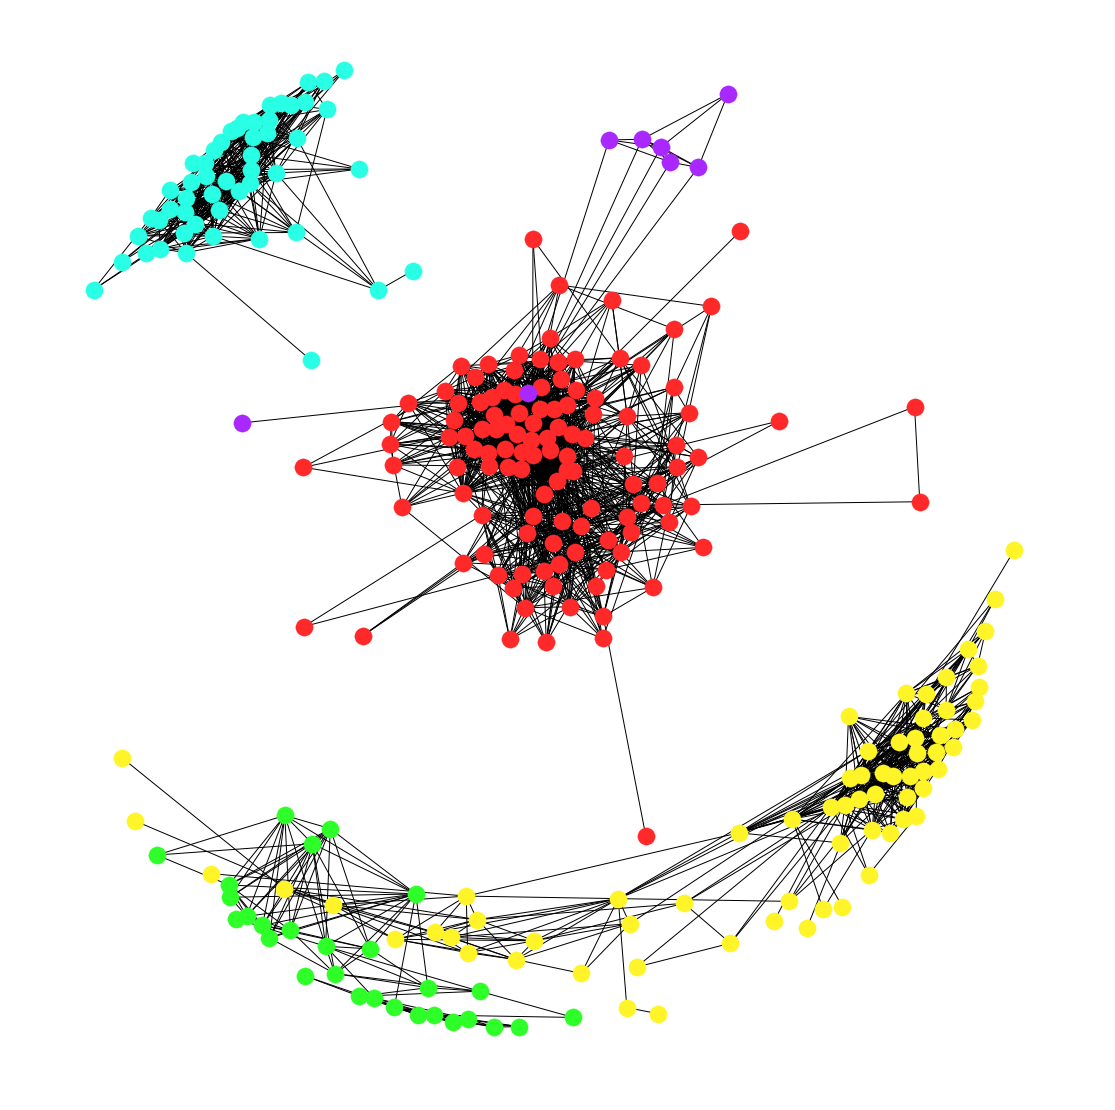

In [318]:
plt.figure(figsize=(15,15))
nx.draw(G2.subgraph(css[0]), node_color = col[0], pos=pos)
nx.draw(G2.subgraph(css[1]), node_color = col[1], pos=pos)
nx.draw(G2.subgraph(css[2]), node_color = col[2], pos=pos)
nx.draw(G2.subgraph(css[3]), node_color = col[3], pos=pos)
nx.draw(G2.subgraph(css[4]), node_color = col[4], pos=pos)
plt.savefig('cluster01234.png', dpi = 300)
cluss[4]
# MBD 161

In [244]:
import igraph as ig
nx.write_gml(G2, 'G2.gml')
iG = ig.read('G2.gml')
communities = ig.Graph.community_edge_betweenness(iG)
clusters = communities.as_clustering()

In [245]:
css = [[] for i in range(len(clusters))]
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        css[i].append(list(G2.nodes())[clusters[i][j]])
len(css)

6

{108149: 'Sergey Nikolenko',
 1028119: 'Yulya Ibragimova',
 2140262: 'Alexey Muratov',
 2661681: 'Olya Kuznetsova',
 2733642: 'Anna Yudina',
 3577459: 'Artyom Skorobach',
 3719205: 'Viktoria Alexandrova',
 3821006: 'Marina Semenova',
 4261081: 'Maria Belyaeva',
 4874593: 'Alexey Budarin',
 5005171: 'Artur Khachaturyan',
 5362050: 'Anastasia Sidelnikova',
 6395751: 'Marina Ananyeva',
 6647579: 'Mikhail Teterin',
 7395701: 'Andrey Prudnikov',
 8682358: 'Igor Fenyov',
 9418080: 'Tatyana Savelyeva',
 10277465: 'Artem Protasov',
 10959095: 'Anton Gettoev',
 11272653: 'Natasha Smirnova',
 11576382: 'Andrey Ternikov',
 11582282: 'Sergey Konstantinov',
 11650646: 'Tagir Gadiev',
 12276241: 'Nastasya Sergeevna',
 12767721: 'Yulia Nikitina',
 13160438: 'Oksana Ryabinina',
 14252101: 'Viktoria Startseva',
 14656160: 'Alexandra Egorenko',
 15787498: 'Fidan Ganeev',
 15879043: 'Igor Trefilov',
 17860535: 'Sofya Timofeeva',
 17864887: 'Ksenia Chistyakova',
 18014696: 'Bekzod Rakhimov',
 18716821: 'L

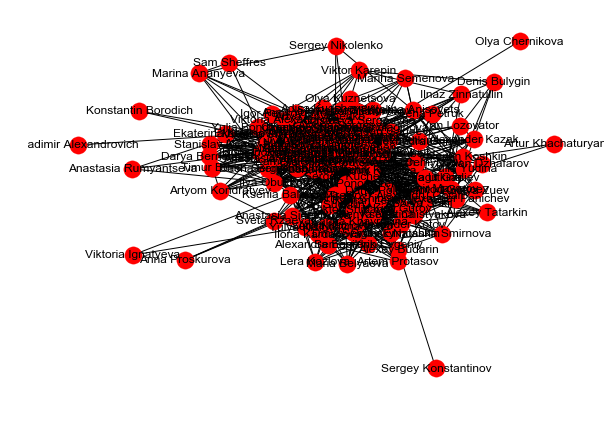

In [253]:
nx.draw(G2.subgraph(css[0]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[0]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[0]),'name')

{592376: 'Vladislav Lashkin',
 955658: 'Marina Didyaeva',
 1268002: 'Ekaterina Alexeeva (Savchenko)',
 2324667: 'Lolita Mageramova',
 3554530: 'Seryoga Metlenko',
 4658123: 'Anastasya Goryacheva:)',
 5207106: 'Anya Lashkina',
 6291827: 'Vyacheslav Kopyl',
 6811812: 'Elts Natalya',
 6892243: 'Daniil Myslevich',
 7357273: 'Ilya Pechatnikov',
 7409881: 'Viktoria Ponomareva',
 7848391: 'Sasha Palkin',
 7971022: 'Egor Ivensky',
 8413028: 'Nastya Nastya',
 9787708: 'Egor Yakovlev',
 10100319: 'Mikhail Glybin',
 10823846: 'Vera Anashkina',
 12586147: 'Anastasia Babenko',
 12791303: 'Mashka Mikhaylova',
 13334128: 'Serge Kapustin',
 13433670: 'Linda Valeeva',
 13512679: 'Elizaveta Nikitina',
 13664803: 'Oleg Golosov',
 13671875: 'Darya Vovnoboy',
 13807736: 'Anita Antipova',
 14397698: 'Anna Mirvis',
 14787669: 'Lolita Mageramova',
 14903745: 'Max Petrov',
 18462202: 'Maria Vassilieva',
 18709943: 'Anastasia Antipova',
 19484369: 'Rostislav Pyshyev',
 19662673: 'Andrey Semyonov',
 31262250: 'I

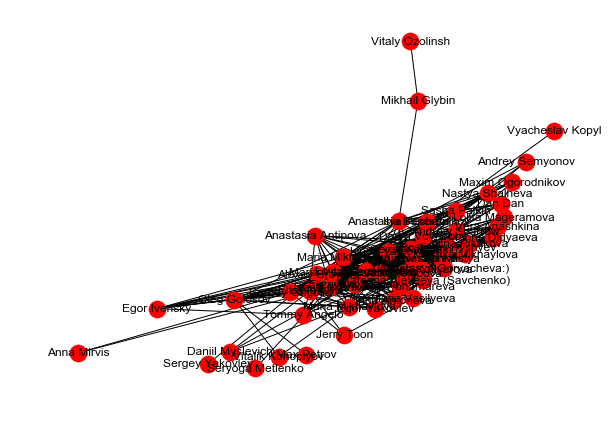

In [254]:
nx.draw(G2.subgraph(css[1]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[1]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[1]),'name')

{5844427: 'Alex Sobolev',
 6328193: 'Seryoga Tkachyov',
 6399028: 'Elizaveta Chizhikova',
 9486570: 'Anton Ivanov',
 10026923: 'Anya Melnikova',
 12550267: 'Igor Vasilyevich',
 16618517: 'Ekaterina Lukina',
 16967584: 'Tyoma Pavlov',
 23716297: 'Anton Varushenyev',
 28342599: 'Roman Pavlyuk',
 39528457: 'Dmitry Gyotze',
 40912547: 'Marat Yarulin',
 52851466: 'Ekaterina Pavlova',
 57235446: 'Ivan Rossol',
 74090935: 'Philip Komkov',
 91352887: 'Prosto Vitalya',
 92005184: 'Viola Likhoyda',
 107344133: 'Nikita Ivanov',
 134551632: 'Vasily Grossman',
 183046681: 'Igor Mitsevsky',
 183923448: 'Stas Karpov',
 193500679: 'Denis Vladimirovich',
 197336828: 'Oo Oo',
 216751131: 'Alexander Rossol',
 224212472: 'Tyoma Tyoma',
 367553720: 'Ira Chetvergova',
 370172458: 'Prosto Vanya',
 370371447: 'Anatoly Dukalis'}

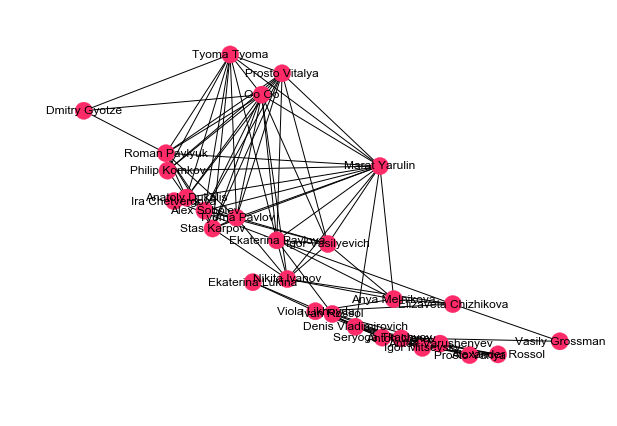

In [248]:
nx.draw(G2.subgraph(cluss[2]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cluss[2]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cluss[2]),'name')

{1677259: 'Alexey Avramenko',
 1951327: 'Misha Karpets',
 3082394: 'Maxim Karpov',
 4447674: 'Natasha Jess',
 5349161: 'Shir Shir',
 9100545: 'Mikhail Artemyev',
 9480188: 'Alisa Prostotak',
 9604324: 'Lena Chudakova',
 9693167: 'Evgeny Tetin',
 10095074: 'Ekaterina Skibina',
 12778679: 'Sergey Latatye',
 13237517: 'Oleg Bulanov',
 13986867: 'Sergey Demin',
 16447212: 'Alexander Ageev',
 16677020: 'Bogdan Voronin',
 17292244: 'Ilya Uvarenkov',
 19034163: 'Alexey Barsukov',
 19185624: 'Tsyren Balzhanov',
 19237456: 'Pavel Danilov',
 20287001: 'Valery Kharitonov',
 20376978: 'Rinat Sadykov',
 20497665: 'Leonid Gremyachikh',
 21679895: 'Nadezhda Kostyakova',
 23461709: 'Artyom Ryzhikov',
 23536310: 'Dmitry Meynster',
 25040493: 'Alexander Korotin',
 30623577: 'Rost Gorislavsky',
 31871401: 'Alexander Plentsov',
 33151990: 'Vahe Egiazaryan',
 36267995: 'Dmitry Chernovol',
 38076870: 'Roman Alexandrov',
 41845132: 'Artur Petrosyan',
 45584469: 'Dima Kurgansky',
 49217586: 'Andrey Zakharov',

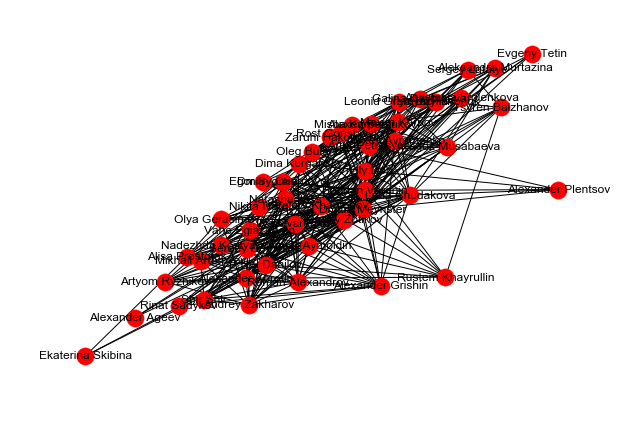

In [255]:
nx.draw(G2.subgraph(css[3]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[3]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[3]),'name')

{2205237: 'Kira Kirelli',
 2309471: 'Ksenia Lotos',
 3077652: 'Roman Afanasyev',
 3155266: 'Lyuda Burchenkova',
 8881606: 'Regina Chemyakina',
 9616429: 'Gyuzal Mustafaeva',
 10200614: 'Sergey Vakhnin',
 15301988: 'Lyonya Gavrikov',
 17279521: 'Maria Malyakova',
 25376552: 'Igoryok Grechin',
 33553987: 'Svetlana Sannikova',
 39865284: 'Igor Filippov',
 48054094: 'Styopa Krapiva',
 53114766: 'Kirill Boykov',
 64018416: 'Alexander Kozyrev',
 66182341: 'Tatyana Ivanova',
 115388732: 'Sergey Shrub',
 140713255: 'Andrey Ivanov'}

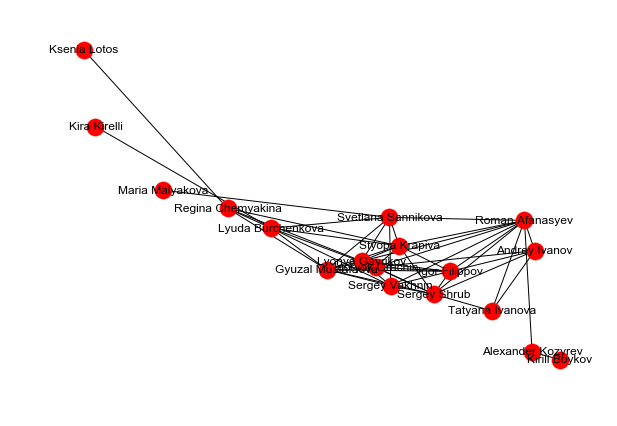

In [256]:
nx.draw(G2.subgraph(css[4]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[4]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[4]),'name')

{25279250: 'Denis Goryunov',
 54486207: 'Albert Yagodin',
 108848679: 'Nikita Nesterov',
 181129433: 'Evgeny Mateshev',
 185081231: 'Vitalia Panteleychuk',
 351961278: 'Aleksey Shelkovin'}

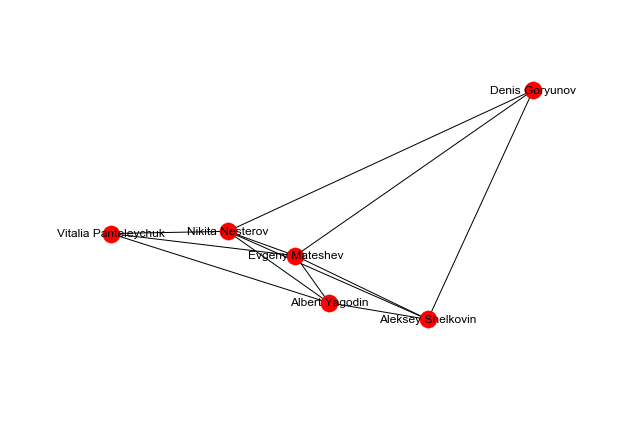

In [257]:
nx.draw(G2.subgraph(css[5]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(css[5]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(css[5]),'name')

summary first alghorithm less comunity less mistakes all comunites was true 1)-spb 2)-pskov (1 company) 3)-pskov (2-nd company) 4)-HSE msk students 5)-Mafia club players
on the last there was +1 community from pskov (another company but several mistake for other comunities) as example mafia commnunity was not full. 

### 3.3. Implement and use algorithms from the class
i have used edge betweness in the previous part (2-nd type of clystering).

In [258]:
#Markov Cluster Algorithm (MCL).
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        print 'step ', step
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()

In [259]:
A = nx.to_numpy_matrix(G2) 
A = np.asarray(A) 

In [271]:
cliqComm = nx.k_clique_communities(G2, 3)
cliqComm=list(cliqComm)
cliqComm

[frozenset({1677259,
            1951327,
            3082394,
            4447674,
            5349161,
            6395751,
            9100545,
            9480188,
            9604324,
            9693167,
            10095074,
            12778679,
            13237517,
            13986867,
            16447212,
            16677020,
            17292244,
            19034163,
            19185624,
            19237456,
            20287001,
            20376978,
            20497665,
            21679895,
            23461709,
            23536310,
            25040493,
            30623577,
            31871401,
            33151990,
            36267995,
            38076870,
            41845132,
            45584469,
            49217586,
            58922614,
            72255503,
            80981182,
            86186392,
            99233349,
            114089607,
            146062456,
            150859067,
            170996341,
            172405177,
            182

### 3.4 Make more visible results
I have got interesting Pskov commnunities very small but they are correct this is real community of people that knows each other and other people from my friends list knows only 1 of them.

In [269]:
A2=MCL(A,0,2,2)
A2

step  1
step  2
step  3
step  4
step  5
step  6
step  7
step  8
step  9
step  10
step  11
step  12
step  13
step  14
step  15
step  16
step  17
step  18
step  19
step  20


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

{1677259: 'Alexey Avramenko',
 1951327: 'Misha Karpets',
 3082394: 'Maxim Karpov',
 4447674: 'Natasha Jess',
 5349161: 'Shir Shir',
 6395751: 'Marina Ananyeva',
 9100545: 'Mikhail Artemyev',
 9480188: 'Alisa Prostotak',
 9604324: 'Lena Chudakova',
 9693167: 'Evgeny Tetin',
 10095074: 'Ekaterina Skibina',
 12778679: 'Sergey Latatye',
 13237517: 'Oleg Bulanov',
 13986867: 'Sergey Demin',
 16447212: 'Alexander Ageev',
 16677020: 'Bogdan Voronin',
 17292244: 'Ilya Uvarenkov',
 19034163: 'Alexey Barsukov',
 19185624: 'Tsyren Balzhanov',
 19237456: 'Pavel Danilov',
 20287001: 'Valery Kharitonov',
 20376978: 'Rinat Sadykov',
 20497665: 'Leonid Gremyachikh',
 21679895: 'Nadezhda Kostyakova',
 23461709: 'Artyom Ryzhikov',
 23536310: 'Dmitry Meynster',
 25040493: 'Alexander Korotin',
 30623577: 'Rost Gorislavsky',
 31871401: 'Alexander Plentsov',
 33151990: 'Vahe Egiazaryan',
 36267995: 'Dmitry Chernovol',
 38076870: 'Roman Alexandrov',
 41845132: 'Artur Petrosyan',
 45584469: 'Dima Kurgansky',


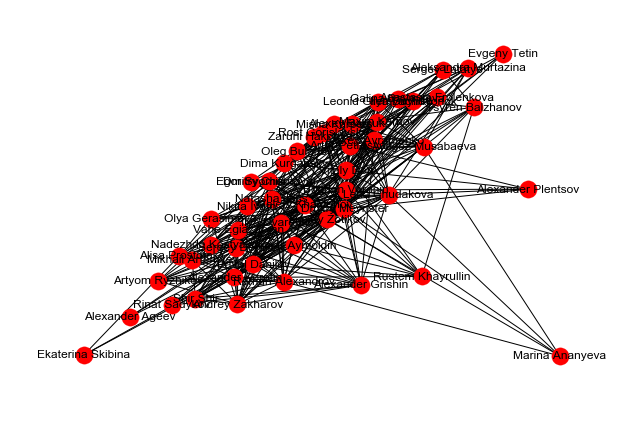

In [292]:
nx.draw(G2.subgraph(cliqComm[0]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[0]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[0]),'name')
# Hse msk students group

{108149: 'Sergey Nikolenko',
 1028119: 'Yulya Ibragimova',
 2140262: 'Alexey Muratov',
 2661681: 'Olya Kuznetsova',
 2733642: 'Anna Yudina',
 3577459: 'Artyom Skorobach',
 3719205: 'Viktoria Alexandrova',
 3821006: 'Marina Semenova',
 4261081: 'Maria Belyaeva',
 4874593: 'Alexey Budarin',
 5005171: 'Artur Khachaturyan',
 5362050: 'Anastasia Sidelnikova',
 6395751: 'Marina Ananyeva',
 6647579: 'Mikhail Teterin',
 7395701: 'Andrey Prudnikov',
 8682358: 'Igor Fenyov',
 9418080: 'Tatyana Savelyeva',
 10277465: 'Artem Protasov',
 10959095: 'Anton Gettoev',
 11272653: 'Natasha Smirnova',
 11576382: 'Andrey Ternikov',
 11650646: 'Tagir Gadiev',
 12276241: 'Nastasya Sergeevna',
 12767721: 'Yulia Nikitina',
 13160438: 'Oksana Ryabinina',
 14252101: 'Viktoria Startseva',
 14656160: 'Alexandra Egorenko',
 15787498: 'Fidan Ganeev',
 15879043: 'Igor Trefilov',
 17860535: 'Sofya Timofeeva',
 17864887: 'Ksenia Chistyakova',
 18014696: 'Bekzod Rakhimov',
 18716821: 'Lada Kroenen',
 18837178: 'Anastasi

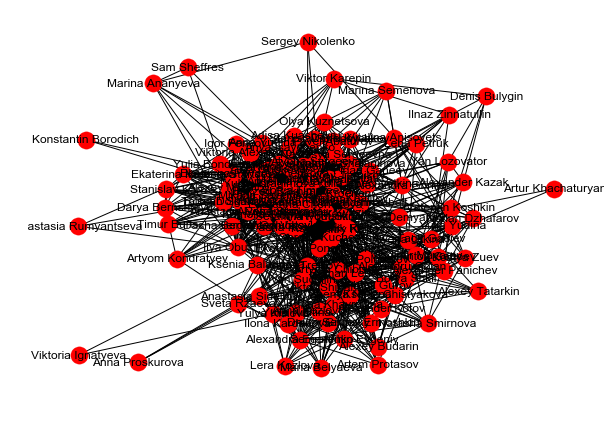

In [293]:
nx.draw(G2.subgraph(cliqComm[1]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[1]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[1]),'name')
#SPB community

{592376: 'Vladislav Lashkin',
 955658: 'Marina Didyaeva',
 1268002: 'Ekaterina Alexeeva (Savchenko)',
 2324667: 'Lolita Mageramova',
 3077652: 'Roman Afanasyev',
 3155266: 'Lyuda Burchenkova',
 4658123: 'Anastasya Goryacheva:)',
 5207106: 'Anya Lashkina',
 6811812: 'Elts Natalya',
 6892243: 'Daniil Myslevich',
 7357273: 'Ilya Pechatnikov',
 7409881: 'Viktoria Ponomareva',
 7848391: 'Sasha Palkin',
 7971022: 'Egor Ivensky',
 8413028: 'Nastya Nastya',
 8881606: 'Regina Chemyakina',
 9616429: 'Gyuzal Mustafaeva',
 9787708: 'Egor Yakovlev',
 10200614: 'Sergey Vakhnin',
 10823846: 'Vera Anashkina',
 12586147: 'Anastasia Babenko',
 12791303: 'Mashka Mikhaylova',
 13334128: 'Serge Kapustin',
 13433670: 'Linda Valeeva',
 13512679: 'Elizaveta Nikitina',
 13664803: 'Oleg Golosov',
 13671875: 'Darya Vovnoboy',
 13807736: 'Anita Antipova',
 14397698: 'Anna Mirvis',
 14787669: 'Lolita Mageramova',
 15301988: 'Lyonya Gavrikov',
 15947613: 'Tatyana Romanovna',
 18462202: 'Maria Vassilieva',
 18709943

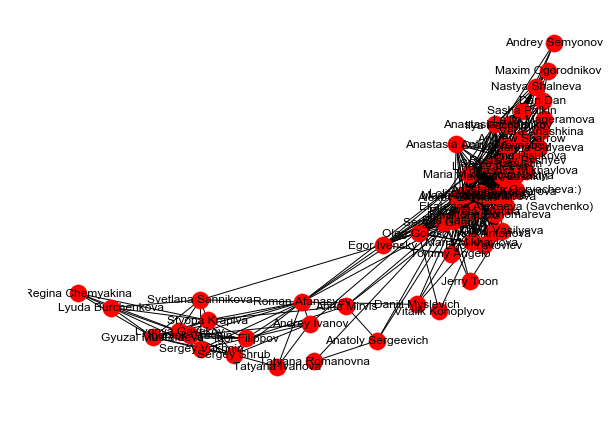

In [294]:
nx.draw(G2.subgraph(cliqComm[2]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[2]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[2]),'name')
#0 Pskov community

{5844427: 'Alex Sobolev',
 6399028: 'Elizaveta Chizhikova',
 10026923: 'Anya Melnikova',
 12550267: 'Igor Vasilyevich',
 15947613: 'Tatyana Romanovna',
 16967584: 'Tyoma Pavlov',
 28342599: 'Roman Pavlyuk',
 39528457: 'Dmitry Gyotze',
 40912547: 'Marat Yarulin',
 52851466: 'Ekaterina Pavlova',
 74090935: 'Philip Komkov',
 91352887: 'Prosto Vitalya',
 92005184: 'Viola Likhoyda',
 107344133: 'Nikita Ivanov',
 183923448: 'Stas Karpov',
 197336828: 'Oo Oo',
 224212472: 'Tyoma Tyoma',
 370371447: 'Anatoly Dukalis'}

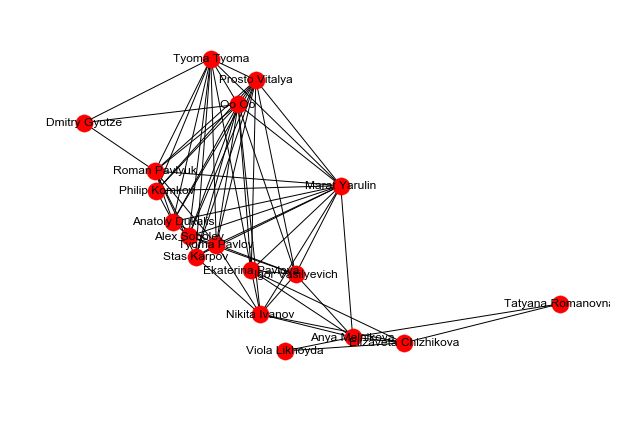

In [296]:
nx.draw(G2.subgraph(cliqComm[3]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[3]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[3]),'name')
#1 Pskov community

{6328193: 'Seryoga Tkachyov',
 9486570: 'Anton Ivanov',
 16618517: 'Ekaterina Lukina',
 23716297: 'Anton Varushenyev',
 57235446: 'Ivan Rossol',
 92005184: 'Viola Likhoyda',
 183046681: 'Igor Mitsevsky',
 193500679: 'Denis Vladimirovich',
 216751131: 'Alexander Rossol',
 370172458: 'Prosto Vanya'}

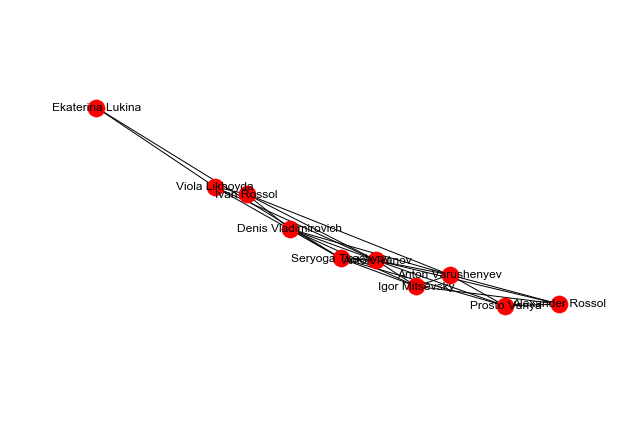

In [297]:
nx.draw(G2.subgraph(cliqComm[4]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[4]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[4]),'name')
#2 Pskov community

{25279250: 'Denis Goryunov',
 34488318: 'Igor Shapovalov',
 54486207: 'Albert Yagodin',
 108848679: 'Nikita Nesterov',
 181129433: 'Evgeny Mateshev',
 185081231: 'Vitalia Panteleychuk',
 351961278: 'Aleksey Shelkovin'}

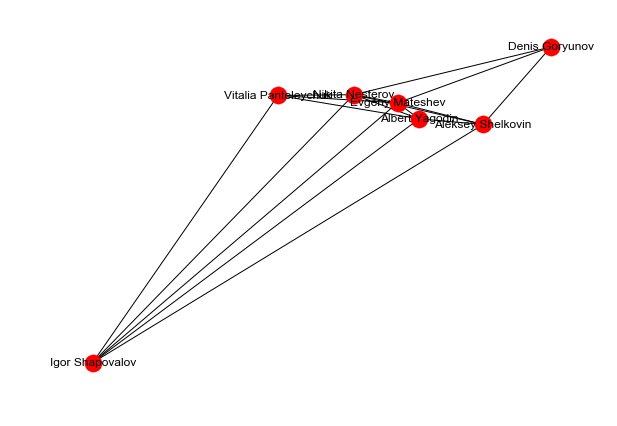

In [298]:
nx.draw(G2.subgraph(cliqComm[5]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[5]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[5]),'name')
#MAFIA community

{10100319: 'Mikhail Glybin',
 10959095: 'Anton Gettoev',
 47680087: 'Vitaly Ozolinsh'}

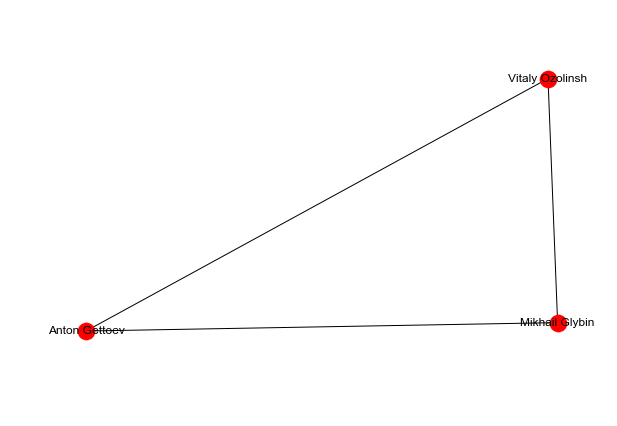

In [299]:
nx.draw(G2.subgraph(cliqComm[6]), pos=pos,labels=nx.get_node_attributes(G2.subgraph(cliqComm[6]),'name'), with_labels=True)
nx.get_node_attributes(G2.subgraph(cliqComm[6]),'name')
#3 Pskov community